In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('personal_finance_employees_V1.csv')
print(df)

       Employee  Monthly Income (£)  Electricity Bill (£)  Gas Bill (£)  \
0    Employee_1             4999.39            120.000000     80.000000   
1    Employee_2             4660.24            120.000000     80.000000   
2    Employee_3             1942.89            124.679456     98.134600   
3    Employee_4             3565.80            120.000000     80.000000   
4    Employee_5             5121.99            120.000000     80.000000   
5    Employee_6             4182.71            120.000000     80.000000   
6    Employee_7             5924.83            120.000000     80.000000   
7    Employee_8             3714.05            120.000000     80.000000   
8    Employee_9             3096.13            120.000000     80.000000   
9   Employee_10             3330.21            120.000000     80.000000   
10  Employee_11             2403.29            120.000000     80.000000   
11  Employee_12             1270.58            112.425851     78.419390   
12  Employee_13          

round everything to 2 decimal points

In [3]:
df = df.round(2)
print(df)

       Employee  Monthly Income (£)  Electricity Bill (£)  Gas Bill (£)  \
0    Employee_1             4999.39                120.00         80.00   
1    Employee_2             4660.24                120.00         80.00   
2    Employee_3             1942.89                124.68         98.13   
3    Employee_4             3565.80                120.00         80.00   
4    Employee_5             5121.99                120.00         80.00   
5    Employee_6             4182.71                120.00         80.00   
6    Employee_7             5924.83                120.00         80.00   
7    Employee_8             3714.05                120.00         80.00   
8    Employee_9             3096.13                120.00         80.00   
9   Employee_10             3330.21                120.00         80.00   
10  Employee_11             2403.29                120.00         80.00   
11  Employee_12             1270.58                112.43         78.42   
12  Employee_13          

 Categories: Income, bills, entertainment, transport, savings

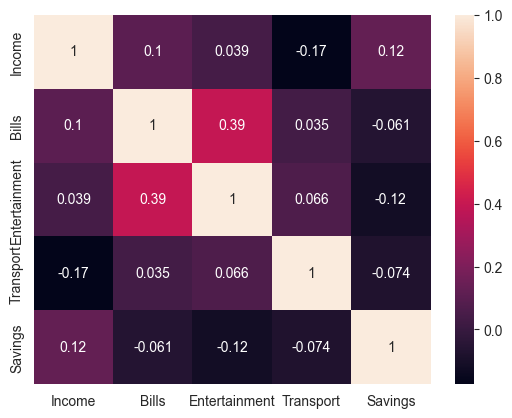

In [4]:
df_corrdata = {
    'Income': df['Monthly Income (£)'],
    'Bills': df['Electricity Bill (£)'] + df['Gas Bill (£)'] + df['Water Bill (£)'],
    'Entertainment': df['Amazon Prime (£)'] + df['Netflix (£)'] + df['Sky Sports (£)'],
    'Transport': df['Transportation (£)'],
    'Savings': df['Savings for Property (£)']
}
df_corrdata = pd.DataFrame(df_corrdata)
df_corrdata.fillna(0, inplace=True)
corrMatrix = df_corrdata.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [7]:
df.fillna(0, inplace=True)
df_KmeansData = {
    'Income' : df['Monthly Income (£)'],
    'Spendings' : df['Electricity Bill (£)'] + df['Gas Bill (£)'] + df['Netflix (£)'] + df['Amazon Prime (£)'] + df['Groceries (£)'] + df['Transportation (£)'] + df['Water Bill (£)'] + df['Sky Sports (£)'] + df['Other Expenses (£)'] + df['Savings for Property (£)'] + df['Monthly Outing (£)']
}
df_KmeansData = pd.DataFrame(df_KmeansData)
df_KmeansData

,Income,Spendings
0,4999.39,1235.79
1,4660.24,1230.46
2,1942.89,1090.63
3,3565.80,1104.70
4,5121.99,1060.26
5,4182.71,1212.74
6,5924.83,638.32
7,3714.05,713.95
8,3096.13,1186.38
9,3330.21,621.30


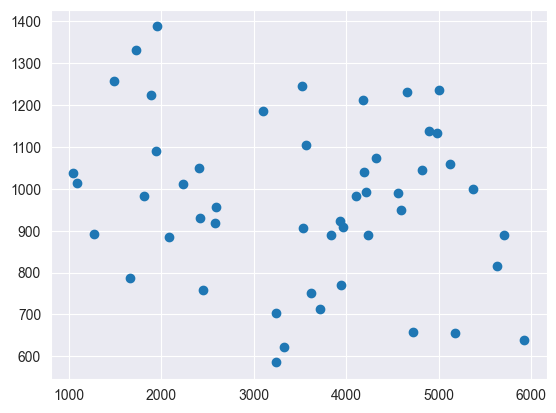

In [8]:
plt.scatter(df_KmeansData['Income'], df_KmeansData['Spendings'])

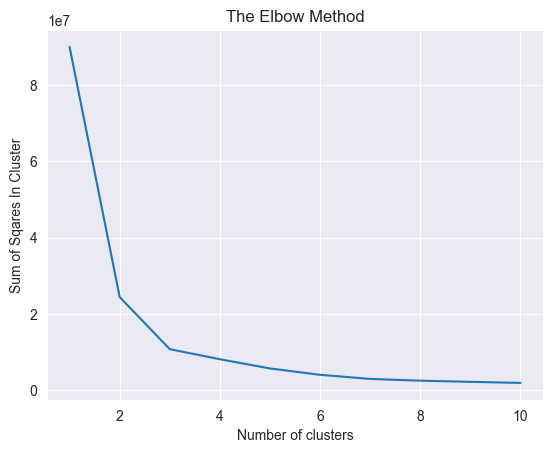

In [12]:
from sklearn.cluster import KMeans
SumSqaresInClusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_KmeansData)
    SumSqaresInClusters.append(kmeans.inertia_)
plt.plot(range(1, 11), SumSqaresInClusters)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Sqares In Cluster')
plt.show()

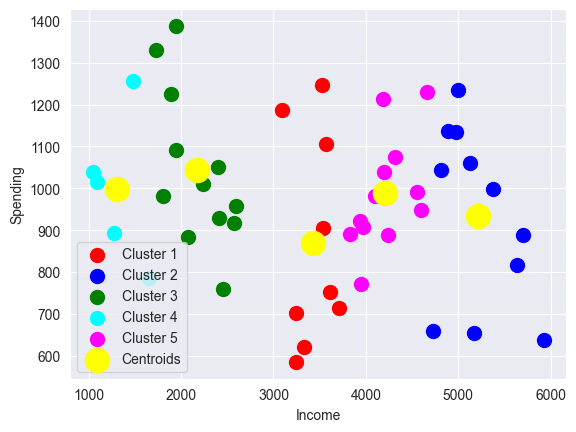

In [21]:
data = df_KmeansData.values 
y_kmeans = kmeans.fit_predict(data)

plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()
